In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução,_teste_pcr,_teste_anticorpo,_teste_antigeno,_teste_igm,_teste_igg
0,37.0,30a - 39a,F,CIDADE NOVA,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
1,30.0,30a - 39a,M,JAPIIM,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
2,30.0,30a - 39a,M,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
3,54.0,50a - 59a,M,TANCREDO NEVES,Em análise,Não,Não,Não,Não,Recuperado,...,NaN,NaN,NaN,"eSUS VE,",NaN,0.0,0.0,0.0,0.0,0.0
4,43.0,40a - 49a,F,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0


In [35]:
teste = df.loc[df['_classificacao'] == 'Confirmado']

In [40]:
#Todos os casos por faixa etaria
faixas_etarias = teste['_faixa etária'].value_counts()
faixas_etarias

40a - 49a    9674
30a - 39a    8865
50a - 59a    6329
20a - 29a    4935
60a - 69a    3420
70a - 79a    1780
80a ou +      999
15a - 19a     743
10a - 14a     462
 1a - 4a      421
 5a - 9a      342
 < 1a         320
em branco      57
Name: _faixa etária, dtype: int64

In [41]:
list_of_tuples = list(zip(faixas_etarias.index, faixas_etarias.values))  

faixas_etarias = pd.DataFrame(list_of_tuples, columns = ['Faixa de Idade', 'Casos'])

display(faixas_etarias)

,Faixa de Idade,Casos
0,40a - 49a,9674
1,30a - 39a,8865
2,50a - 59a,6329
3,20a - 29a,4935
4,60a - 69a,3420
5,70a - 79a,1780
6,80a ou +,999
7,15a - 19a,743
8,10a - 14a,462
9,1a - 4a,421


In [42]:
soma_de_casos = faixas_etarias['Casos'].sum()

for i in range(faixas_etarias['Casos'].size):
    porcentagem = (faixas_etarias['Casos'][i]/soma_de_casos)*100
    
    faixas_etarias['Casos'][i] = porcentagem

display(faixas_etarias)

<ipython-input-42-88f382850747>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixas_etarias['Casos'][i] = porcentagem


,Faixa de Idade,Casos
0,40a - 49a,25
1,30a - 39a,23
2,50a - 59a,16
3,20a - 29a,12
4,60a - 69a,8
5,70a - 79a,4
6,80a ou +,2
7,15a - 19a,1
8,10a - 14a,1
9,1a - 4a,1


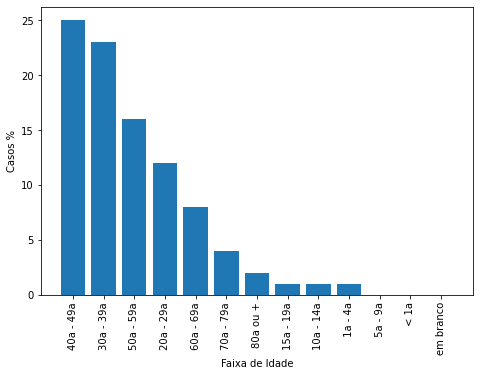

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(faixas_etarias['Faixa de Idade'], faixas_etarias['Casos'])
plt.xticks(faixas_etarias['Faixa de Idade'],rotation=90)
ax.set_xlabel('Faixa de Idade')
ax.set_ylabel('Casos %')

plt.show()

In [45]:
display(faixas_etarias)

,Faixa de Idade,Casos
0,40a - 49a,25
1,30a - 39a,23
2,50a - 59a,16
3,20a - 29a,12
4,60a - 69a,8
5,70a - 79a,4
6,80a ou +,2
7,15a - 19a,1
8,10a - 14a,1
9,1a - 4a,1
